# Handwritten Digit Classification with CNN
This notebook shows how to use a simple convolutional neural network to do image classification. The notebook was written for practice and the original codes were taken from this [tutorial](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/).

Read more about Keras [here](https://keras.io/).

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


First we load the MNIST dataset using a function provided by Keras.

Train dataset features shape: (60000, 28, 28)
Train dataset labels shape: (60000,)
Test dataset features shape: (10000, 28, 28)
Test dataset labels shape: (10000,)


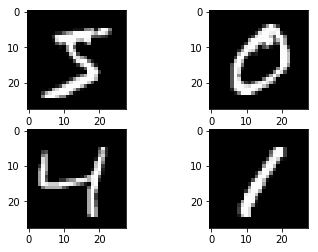

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f'Train dataset features shape: {train_images.shape}')
print(f'Train dataset labels shape: {train_labels.shape}')
print(f'Test dataset features shape: {test_images.shape}')
print(f'Test dataset labels shape: {test_labels.shape}')

plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
plt.show()

Convolutional layer requires the inputs to be 4D, in the format of either [batch]x[channels]x[rows]x[columns] or [batch]x[rows]x[columns]x[channels]. The default is set to 'channel_last', which is the latter. Since the images in MNIST are in grey-scale, there is only going to be one channel for the input images. Batch represents how many images there are in the dataset for the input layer.

You can read more about how Keras' convolutional layer works [here](https://keras.io/layers/convolutional/).

In [3]:
train_x = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_x = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

We'll also normalize the data, as well as one-shot encode the outputs.

In [4]:
train_x = train_x / 255
test_x = test_x / 255

train_y = np_utils.to_categorical(train_labels)
test_y = np_utils.to_categorical(test_labels)
num_classes = test_y.shape[1]

Now, let's define our model.

In [5]:
def classification_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(28, 28, 1), data_format='channels_last', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Now that we have the data and the model, we can start the training process.

In [6]:
model = classification_model()
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(test_x, test_y, verbose=0)
print('Error Rate: {0:.2f}%'.format(100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 131s - loss: 0.2386 - acc: 0.9292 - val_loss: 0.0743 - val_acc: 0.9773
Epoch 2/10
 - 130s - loss: 0.0763 - acc: 0.9762 - val_loss: 0.0486 - val_acc: 0.9840
Epoch 3/10
 - 132s - loss: 0.0542 - acc: 0.9827 - val_loss: 0.0403 - val_acc: 0.9877
Epoch 4/10
 - 126s - loss: 0.0417 - acc: 0.9871 - val_loss: 0.0374 - val_acc: 0.9883
Epoch 5/10
 - 127s - loss: 0.0346 - acc: 0.9891 - val_loss: 0.0327 - val_acc: 0.9908
Epoch 6/10
 - 127s - loss: 0.0275 - acc: 0.9913 - val_loss: 0.0360 - val_acc: 0.9889
Epoch 7/10
 - 116s - loss: 0.0245 - acc: 0.9919 - val_loss: 0.0378 - val_acc: 0.9880
Epoch 8/10
 - 127s - loss: 0.0201 - acc: 0.9935 - val_loss: 0.0293 - val_acc: 0.9909
Epoch 9/10
 - 119s - loss: 0.0166 - acc: 0.9944 - val_loss: 0.0462 - val_acc: 0.9857
Epoch 10/10
 - 121s - loss: 0.0147 - acc: 0.9953 - val_loss: 0.0316 - val_acc: 0.9900
Error Rate: 1.00%


Finally, we can use the trained model to do predictions.

In [7]:
pred_probs = model.predict(test_x)
pred_labels = np.argmax(pred_probs, axis=1)

Randomly pick an image from the test dataset.

Predicted label: 8


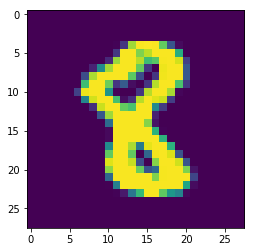

In [8]:
num_test = test_images.shape[0]
rand_index = np.random.randint(num_test)
print(f'Predicted label: {pred_labels[rand_index]}')

plt.imshow(test_images[rand_index])
plt.show()

Let's test a larger network to see if we can get a better result.

In [9]:
def larger_classification_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), data_format='channels_last', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
model_2 = larger_classification_model()
model_2.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=200, verbose=2)
scores = model_2.evaluate(test_x, test_y, verbose=0)
print('Error Rate: {0:.2f}%'.format(100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 112s - loss: 0.4664 - acc: 0.8562 - val_loss: 0.1484 - val_acc: 0.9541
Epoch 2/10
 - 119s - loss: 0.1535 - acc: 0.9531 - val_loss: 0.0892 - val_acc: 0.9725
Epoch 3/10
 - 113s - loss: 0.1069 - acc: 0.9674 - val_loss: 0.0685 - val_acc: 0.9783
Epoch 4/10
 - 110s - loss: 0.0836 - acc: 0.9743 - val_loss: 0.0603 - val_acc: 0.9816
Epoch 5/10
 - 110s - loss: 0.0693 - acc: 0.9784 - val_loss: 0.0469 - val_acc: 0.9845
Epoch 6/10
 - 111s - loss: 0.0605 - acc: 0.9810 - val_loss: 0.0509 - val_acc: 0.9838
Epoch 7/10
 - 111s - loss: 0.0547 - acc: 0.9825 - val_loss: 0.0463 - val_acc: 0.9839
Epoch 8/10
 - 114s - loss: 0.0491 - acc: 0.9842 - val_loss: 0.0380 - val_acc: 0.9867
Epoch 9/10
 - 113s - loss: 0.0446 - acc: 0.9858 - val_loss: 0.0406 - val_acc: 0.9870
Epoch 10/10
 - 110s - loss: 0.0406 - acc: 0.9872 - val_loss: 0.0393 - val_acc: 0.9863
Error Rate: 1.37%


Here we see that the second model actually has higher error rate than the previous one. There are many optimization techniques that we could use to improve a network's performance that we have not used here. From observation, it seems that a simply network is enough to classify MNIST images pretty well. As the features and classification task grow more complex (i.e. larger number of labels and complicated objects), we will need more larger network to achieve high accuracy.